In [1]:
#importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

### Understanding the data

In [2]:
#importing the dataset 
bikedata = pd.read_csv('day.csv')

In [3]:
bikedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#exploring the datset
bikedata.shape

(730, 16)

In [5]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bikedata.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#Changing the date time format and deriving 'the days since service opened'
bikedata['days_old'] = (pd.to_datetime(bikedata['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [8]:
#dropping the 'instant' column as it is not necessary for the analysis
bikedata.drop(['instant'], axis=1, inplace= True)

#dropping the 'casual' and 'registered' columns as we have 'cnt' column which is sum of count and registere column
bikedata.drop(['casual'], axis= 1, inplace= True)
bikedata.drop(['registered'], axis= 1, inplace= True)
bikedata.drop(['dteday'], axis= 1, inplace= True)

In [9]:
bikedata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [10]:
bikedata.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,0.413587
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,0.498251
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183,-0.001182
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640,-0.015171
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-0.021862
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080


###  Data Visualization

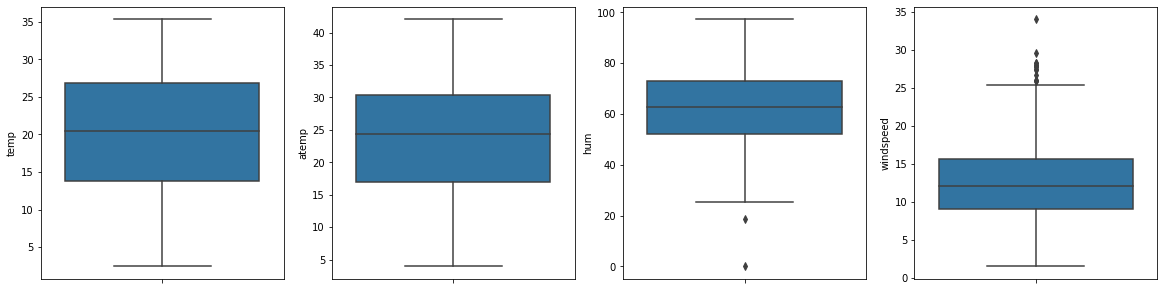

In [11]:
#finding the outliers

plt.figure(figsize= (20, 5))
plt.subplot(1, 4, 1)
sns.boxplot(y= 'temp', data= bikedata)
plt.subplot(1, 4, 2)
sns.boxplot(y= 'atemp', data= bikedata)
plt.subplot(1, 4, 3)
sns.boxplot(y= 'hum', data= bikedata)
plt.subplot(1, 4, 4)
sns.boxplot(y= 'windspeed', data= bikedata)
plt.show()

In [12]:
# Conversion of numeric values to categorical data
bikedata.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bikedata.weathersit.replace({1:'clear',2:'mist_cloud',3:'lsnow_rain',4:'hsnow_rain'},inplace = True)

bikedata.mnth = bikedata.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bikedata.weekday = bikedata.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bikedata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,mon,1,mist_cloud,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,mist_cloud,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600,4


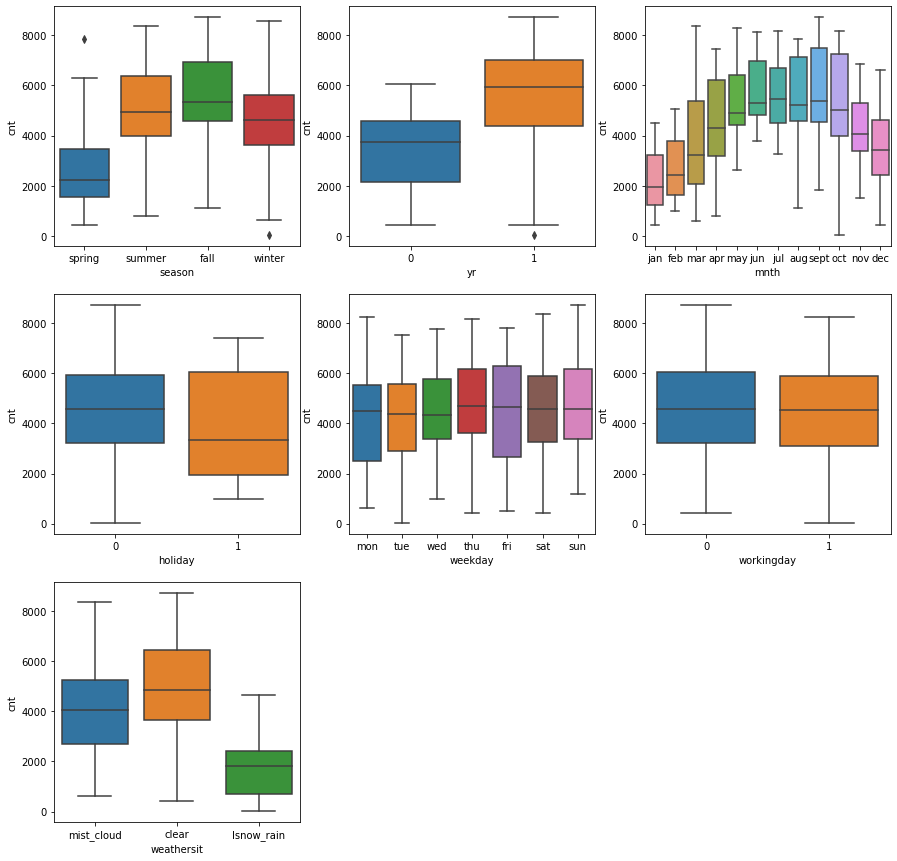

In [13]:
# Visualization of categorical variables
plt.figure(figsize=(15, 15))
plt.subplot(3, 3, 1)
sns.boxplot(x='season', y= 'cnt', data= bikedata)
plt.subplot(3, 3, 2)
sns.boxplot(x='yr', y= 'cnt', data= bikedata)
plt.subplot(3, 3, 3)
sns.boxplot(x='mnth', y= 'cnt', data= bikedata)
plt.subplot(3, 3, 4)
sns.boxplot(x='holiday', y= 'cnt', data= bikedata)
plt.subplot(3, 3, 5)
sns.boxplot(x='weekday', y= 'cnt', data= bikedata)
plt.subplot(3, 3, 6)
sns.boxplot(x='workingday', y= 'cnt', data= bikedata)
plt.subplot(3, 3, 7)
sns.boxplot(x='weathersit', y= 'cnt', data= bikedata)
plt.show()

- Fall has highest demand for rental bikes.
- Demand has grown in 2nd year.
- Demand kept growing contyinuously till June and dipped in July, then kept growing and reached to its peak in september and then sharply decreased later.
- Demand is lowered on holidays.
- Saturday scores high demand but on sunday the demand is byfar the lowest.
- The demand is highest when the weather is good, but on bad weather the demand decreas sharply.

<Figure size 1080x1080 with 0 Axes>

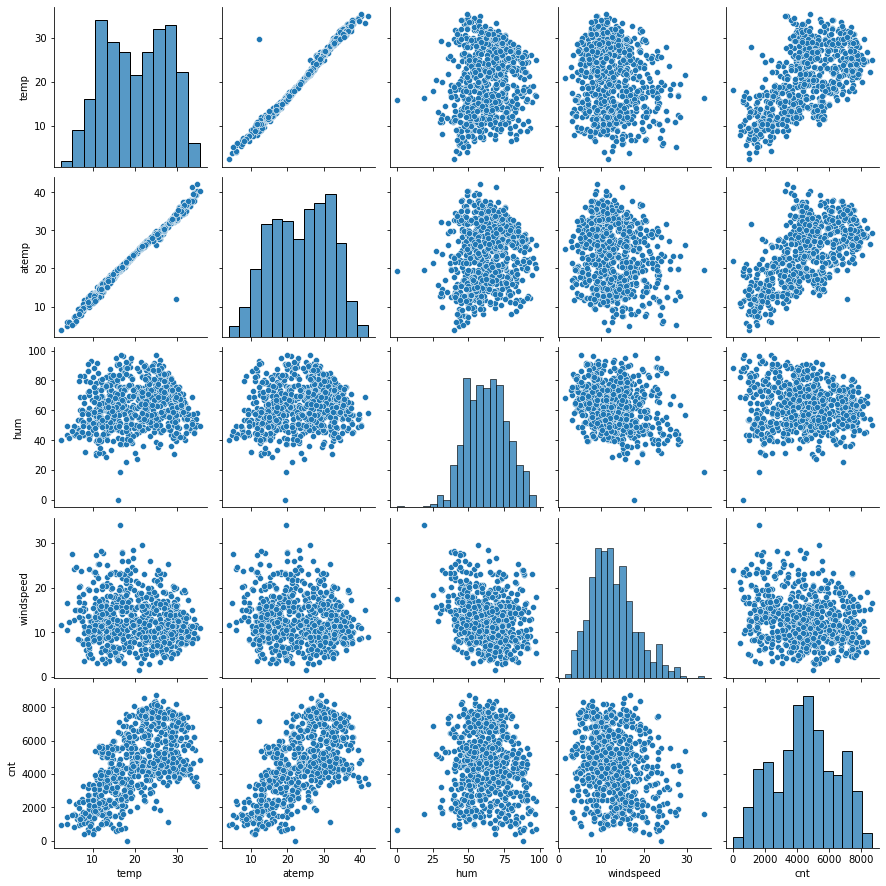

In [14]:
plt.figure(figsize=(15, 15))
sns.pairplot(data= bikedata, vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt'])
plt.show()

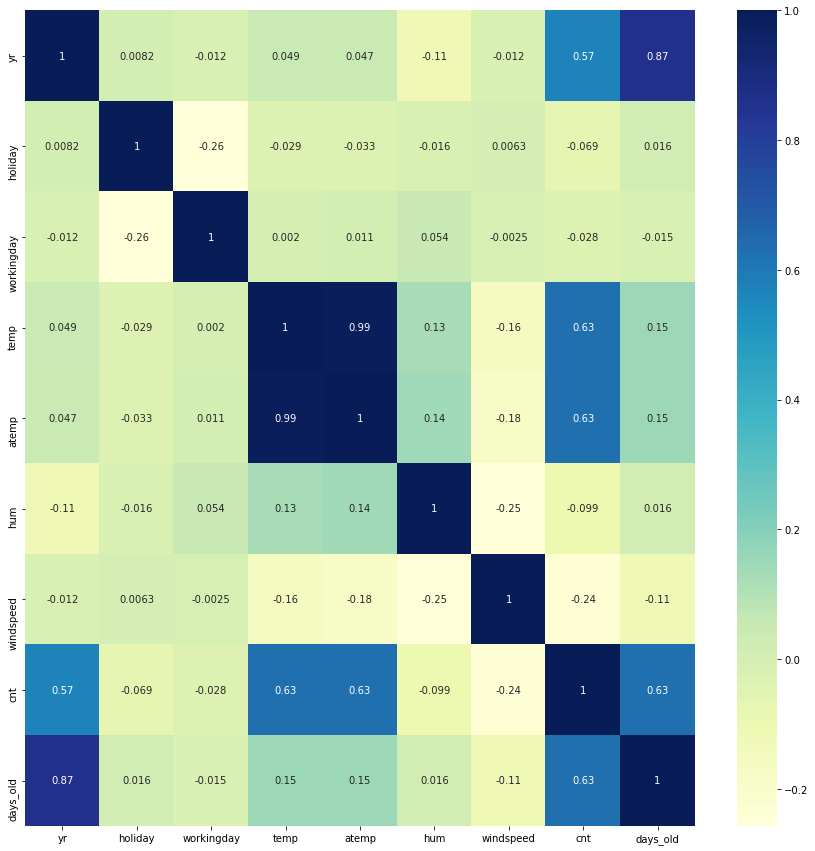

In [15]:
corr = bikedata.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corr, annot= True, cmap='YlGnBu')
plt.show()

###  Creating Dummy Values

In [16]:
d_seasons = pd.get_dummies(bikedata['season'], drop_first= True)
d_seasons.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [17]:
d_months = pd.get_dummies(bikedata['mnth'], drop_first= True)
d_months.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [18]:
d_weekday = pd.get_dummies(bikedata['weekday'], drop_first= True)
d_weekday.head()

,mon,sat,sun,thu,tue,wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [19]:
d_weathersit = pd.get_dummies(bikedata['weathersit'], drop_first= True)
d_weathersit.head()

,lsnow_rain,mist_cloud
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [20]:
# Adding dummy variables in bikedata
bikedata = pd.concat([bikedata, d_seasons, d_months, d_weekday,d_weathersit], axis= 1)

In [21]:
# Removing the orginal variables instead of dummy variables
bikedata = bikedata.drop(['season', 'mnth', 'weekday', 'weathersit'], axis= 1)
bikedata.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,spring,...,oct,sept,mon,sat,sun,thu,tue,wed,lsnow_rain,mist_cloud
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,0,0,0


### Building a Linear Model

In [22]:
train, test  = train_test_split(bikedata,  train_size=0.70, test_size=0.30,  random_state= 100)

In [23]:
scaler = MinMaxScaler()

In [24]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
train[num_vars] = scaler.fit_transform(train[num_vars])

In [25]:
train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,spring,...,oct,sept,mon,sat,sun,thu,tue,wed,lsnow_rain,mist_cloud
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,653,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,576,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,426,1,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,728,1,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,482,0,...,0,0,0,0,1,0,0,0,0,1


In [26]:
y_train = train.pop('cnt')
X_train = train

In [27]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [28]:
# Running RFE
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [29]:
list(zip(X_train.columns, rfe.support_ , rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', False, 16),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 14),
 ('mar', False, 15),
 ('may', False, 7),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sept', True, 1),
 ('mon', False, 9),
 ('sat', False, 4),
 ('sun', False, 5),
 ('thu', False, 13),
 ('tue', False, 8),
 ('wed', False, 11),
 ('lsnow_rain', True, 1),
 ('mist_cloud', True, 1)]

In [30]:
clm = X_train.columns[rfe.support_]
clm

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'dec', 'jan', 'jul', 'nov', 'sept', 'lsnow_rain',
       'mist_cloud'],
      dtype='object')

In [31]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'days_old', 'aug', 'feb', 'jun', 'mar', 'may',
       'oct', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

## Manual Elimination


#### Model 1

In [32]:
X_train_rfe = X_train[clm]

In [33]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [34]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [35]:
lm.params

const         0.320243
yr            0.230328
holiday      -0.091228
temp          0.479977
hum          -0.160227
windspeed    -0.188457
spring       -0.061737
summer        0.040767
winter        0.103435
dec          -0.037199
jan          -0.043748
jul          -0.055495
nov          -0.040949
sept          0.074891
lsnow_rain   -0.248116
mist_cloud   -0.055876
dtype: float64

In [36]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 31 Jan 2022   Prob (F-statistic):          3.34e-189
Time:                        18:31:52   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3202      0.036      8.886      0.0

#### Model 2

In [37]:
X_train_1 = X_train_rfe.drop(["jan"], axis = 1)
X_train_lm = sm.add_constant(X_train_1)
lm_2 = sm.OLS(y_train,X_train_lm).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Mon, 31 Jan 2022   Prob (F-statistic):          4.24e-189
Time:                        18:31:52   Log-Likelihood:                 511.73
No. Observations:                 510   AIC:                            -993.5
Df Residuals:                     495   BIC:                            -929.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3006      0.035      8.521      0.0

### Checking VIF

In [38]:
vif = pd.DataFrame()
X = X_train_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,78.28
6,spring,5.24
3,temp,3.95
8,winter,3.77
7,summer,2.71
4,hum,1.91
11,nov,1.73
14,mist_cloud,1.57
10,jul,1.48
9,dec,1.40


#### Model 3

In [39]:
X_train_2 = X_train_1.drop(['dec'], axis=1)
X_train_lm = sm.add_constant(X_train_2)
lm_3 = sm.OLS(y_train,X_train_lm).fit()
print(lm_3.summary())

vif = pd.DataFrame()
X = X_train_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Mon, 31 Jan 2022   Prob (F-statistic):          9.74e-190
Time:                        18:31:53   Log-Likelihood:                 510.48
No. Observations:                 510   AIC:                            -993.0
Df Residuals:                     496   BIC:                            -933.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2909      0.035      8.365      0.0

,Features,VIF
0,const,75.84
6,spring,5.14
3,temp,3.69
8,winter,3.67
7,summer,2.65
4,hum,1.90
13,mist_cloud,1.56
9,jul,1.48
10,nov,1.48
11,sept,1.31


#### Model 4

In [40]:
X_train_3 = X_train_2.drop(['nov'], axis=1)
X_train_lm = sm.add_constant(X_train_3)

lm_4 = sm.OLS(y_train,X_train_lm).fit() 

print(lm_4.summary())

vif = pd.DataFrame()
X = X_train_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Mon, 31 Jan 2022   Prob (F-statistic):          1.69e-190
Time:                        18:31:53   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2841      0.034      8.242      0.0

,Features,VIF
0,const,74.38
6,spring,5.02
3,temp,3.61
8,winter,3.49
7,summer,2.61
4,hum,1.90
12,mist_cloud,1.56
9,jul,1.48
10,sept,1.30
11,lsnow_rain,1.24


#### Model 5

In [41]:
X_train_4 = X_train_3.drop(['const'], axis=1)
X_train_lm = sm.add_constant(X_train_4)

lm = sm.OLS(y_train,X_train_lm).fit() 

print(lm.summary())

vif = pd.DataFrame()
X = X_train_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Mon, 31 Jan 2022   Prob (F-statistic):          1.69e-190
Time:                        18:31:53   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2841      0.034      8.242      0.0

,Features,VIF
3,hum,28.06
2,temp,16.02
4,windspeed,4.65
5,spring,4.01
7,winter,3.35
6,summer,2.78
11,mist_cloud,2.28
0,yr,2.08
8,jul,1.58
9,sept,1.38


#### Model 6

In [42]:
X_train_5 = X_train_4.drop(['hum'], axis=1)
X_train_lm = sm.add_constant(X_train_5)

lm_5 = sm.OLS(y_train,X_train_lm).fit() 

print(lm_5.summary())

vif = pd.DataFrame()
X = X_train_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Mon, 31 Jan 2022   Prob (F-statistic):          2.40e-187
Time:                        18:31:53   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1996      0.030      6.758      0.0

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.21
4,spring,2.08
0,yr,2.07
6,winter,1.79
7,jul,1.58
10,mist_cloud,1.55
8,sept,1.34
9,lsnow_rain,1.08


### Residual Analysis

In [43]:
X_train_5.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'jul', 'sept', 'lsnow_rain', 'mist_cloud'],
      dtype='object')

In [44]:
# Making predictions using the model
X = bikedata[['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'jul', 'sept', 'lsnow_rain', 'mist_cloud']]
X = sm.add_constant(X)
Predicted_views = lm_5.predict(X)

In [45]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(bikedata.cnt, Predicted_views)
r_squared = r2_score(bikedata.cnt, Predicted_views)

In [46]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 23979478.744510755
r_square_value : -5.406475042668532


#### Error Terms

In [47]:
y_train_cnt = lm_5.predict(X_train_lm)

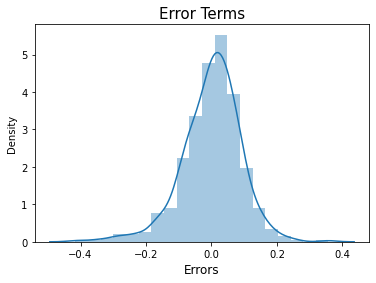

In [48]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
plt.title('Error Terms', fontsize = 15) 
plt.xlabel('Errors', fontsize = 12)
plt.show()

In [49]:
num_vars = ['cnt','hum','windspeed','temp','atemp']


test[num_vars] = scaler.transform(test[num_vars])

In [50]:
test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,spring,...,oct,sept,mon,sat,sun,thu,tue,wed,lsnow_rain,mist_cloud
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.576961,0.000260,1.522877,0.129842,138.115649,355.776256,0.255708,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.246733,0.000955,0.379527,0.051368,57.702212,213.665198,0.437258,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.036034,-0.001962,0.563467,0.015460,13.328946,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.361275,-0.000565,1.239475,0.092963,100.324447,170.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.576697,0.000331,1.495438,0.125381,139.088730,348.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.788281,0.001053,1.791447,0.158650,178.308885,536.500000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.026177,0.002223,2.449286,0.288534,255.062470,729.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
y_test = test.pop('cnt')
X_test = test

In [52]:
# adding constant
X_test = sm.add_constant(X_test)

In [53]:
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]

# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       219 non-null    float64
 1   yr          219 non-null    int64  
 2   holiday     219 non-null    int64  
 3   temp        219 non-null    float64
 4   windspeed   219 non-null    float64
 5   spring      219 non-null    uint8  
 6   summer      219 non-null    uint8  
 7   winter      219 non-null    uint8  
 8   jul         219 non-null    uint8  
 9   sept        219 non-null    uint8  
 10  lsnow_rain  219 non-null    uint8  
 11  mist_cloud  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(7)
memory usage: 11.8 KB


In [54]:
y_pred = lm_5.predict(X_test)

In [55]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-5.703282544542617

In [56]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

22216.970251162817

### Model Evaluation

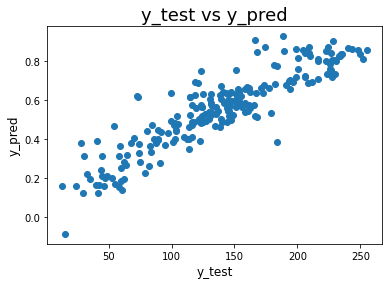

In [57]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
plt.title('y_test vs y_pred', fontsize = 18)
plt.xlabel('y_test', fontsize = 12)
plt.ylabel('y_pred', fontsize = 12)
plt.show()

In [58]:
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,13))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
3,temp,0.530017
0,const,0.284133
1,yr,0.229346
8,winter,0.098745
10,sept,0.083036
7,summer,0.051942
12,mist_cloud,-0.054175
6,spring,-0.056249
9,jul,-0.057536


##### All the positive coefficients - temp, summer, sept, winter indicate increase in these values may lead to increase in value of cnt.

##### All the negative coefficients - spring, mist_cloud, july, holiday, hum, windspeed, lsnow_rain show that increase in these values may lead to dcrease in the  value of cnt.